### pip3 uninstall -y monai numpy transformers wandb czifile pylibCZIrw torch torchvision
### pip3 install numpy
### pip3 install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu118
### pip3 install monai
### pip3 install transformers==4.38.0
### pip3 install wandb
### pip3 install czifile
### pip3 install pylibCZIrw

In [2]:
import matplotlib.pyplot as plt
from model import DINOPipetteDetector
from pipeline import get_pipeline
import torch
import numpy as np
from PIL import Image

/Users/kadenstillwagon/Github/Forest_Lab_Research/HolypipettePipetteDetection/dinov2/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/Users/kadenstillwagon/Github/Forest_Lab_Research/HolypipettePipetteDetection/dinov2/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/Users/kadenstillwagon/Github/Forest_Lab_Research/HolypipettePipetteDetection/dinov2/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


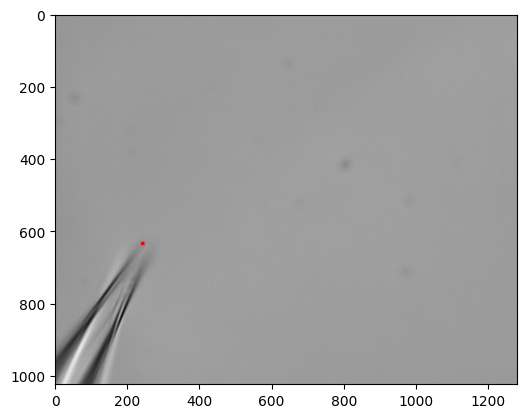

In [4]:
#device setup
device = "cuda" if torch.cuda.is_available() else "cpu"

###############################################
#   COPY BELOW TO GET PIPETTE TIP DETECTIONS
###############################################

model = DINOPipetteDetector()
model.load_state_dict(torch.load('../models/DINOPipetteDetector.pt', map_location=torch.device('cpu')))

model.to(device)

pipeline = get_pipeline(model, device)
image = np.array(Image.open('test_img.png'))
    
coord_preds = pipeline.run(image)

###############################################
#   COPY ABOVE TO GET PIPETTE TIP DETECTIONS
###############################################

test_image = np.expand_dims(image, axis=2)
test_image = np.repeat(test_image, 3, axis=2)

test_image[coord_preds[1]-5:coord_preds[1]+5, coord_preds[0]-5:coord_preds[0]+5, :] = (255, 0, 0)
plt.imshow(test_image)
plt.show()